 Import Required Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Load and Preprocess Labeled Dataset

In [4]:
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

train_data = datagen.flow_from_directory(
    'labeled_data',  # This folder should contain "mild", "moderate", "severe"
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    'labeled_data',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 644 images belonging to 3 classes.
Found 159 images belonging to 3 classes.


Build the CNN Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: mild, moderate, severe
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [6]:
history = model.fit(
    train_data,
    epochs=10,  # You can increase if needed
    validation_data=val_data
)


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4545 - loss: 1.5696 - val_accuracy: 0.6667 - val_loss: 1.1372
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 707ms/step - accuracy: 0.7455 - loss: 0.6025 - val_accuracy: 0.7170 - val_loss: 1.1919
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 689ms/step - accuracy: 0.8459 - loss: 0.4139 - val_accuracy: 0.6415 - val_loss: 1.1417
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 691ms/step - accuracy: 0.8474 - loss: 0.4208 - val_accuracy: 0.7107 - val_loss: 1.2063
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 687ms/step - accuracy: 0.8880 - loss: 0.3337 - val_accuracy: 0.7233 - val_loss: 1.1973
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 692ms/step - accuracy: 0.9111 - loss: 0.2852 - val_accuracy: 0.6981 - val_loss: 1.2996
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 707ms/step - accuracy: 0.9129 - loss: 0.2604 - val_accuracy: 0.6981 - val_loss: 1.3174
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 691ms/step - accuracy: 0.9055 - loss: 0.2705 - val_accurac

Plot Accuracy and Loss (Training vs Validation)

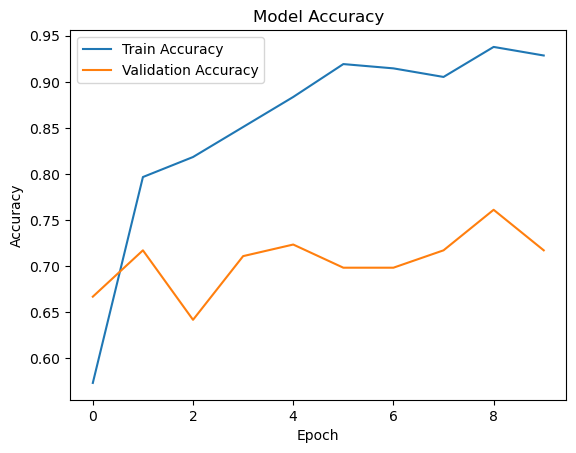

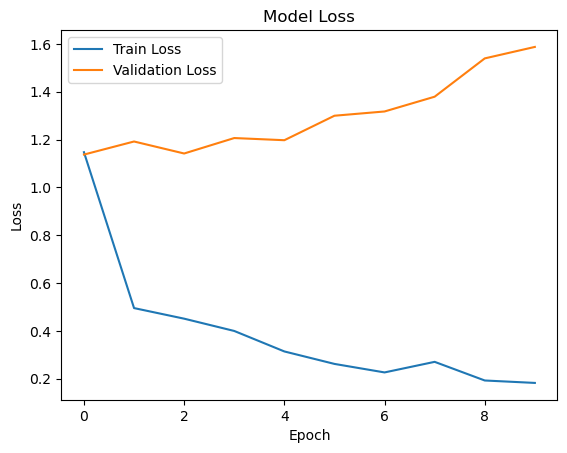

In [8]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Save model